# Word Clouds


## Experiments and Analysis: Text Preprocessing and Word Clouds

This section outlines my experiments with text preprocessing techniques aimed at improving the clarity and accuracy of word cloud visualizations. I applied the following methods:

### Stop Word Removal
Filtered out common stop words to focus on meaningful keywords and reduce noise in the word clouds.

### Lemmatization and Stemming
Both lemmatization and stemming were explored to normalize words. **Lemmatization** was favored as it retains the root form of words without distorting their meaning, while **stemming** was more aggressive and often less precise.

### Part-of-Speech (POS) Tagging
I experimented with POS tagging to identify specific parts of speech (e.g., nouns, verbs) that could be isolated or emphasized in the analysis, improving the relevance of the words visualized.

### Bigrams Creation
Worked on generating bigrams to capture frequently occurring word pairs, further enriching the visualization and revealing relationships between terms.

### Boosting Significant Terms
To enhance the effectiveness of the word clouds, I applied boosting techniques to increase the visibility of important terms, ensuring that key insights from the reviews stood out.

These preprocessing experiments allowed for more insightful and accurate word clouds, providing a clearer representation of the most discussed topics in the text data.


In [3]:
import pandas as pd


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

In [72]:
from nltk import pos_tag
nlp = spacy.load('en_core_web_sm')

In [122]:
from nltk.util import bigrams


In [7]:
from collections import Counter

In [48]:
import spacy
# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

In [52]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt

nltk.download('wordnet')
print("All packages imported successfully!")

All packages imported successfully!


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\R-m-a\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
from gensim.parsing.preprocessing import remove_stopwords


In [6]:
df = pd.read_csv('D:\file.csv')
df.shape

<>:1: SyntaxWarning: invalid escape sequence '\g'
<>:1: SyntaxWarning: invalid escape sequence '\g'
C:\Users\R-m-a\AppData\Local\Temp\ipykernel_35504\3042847023.py:1: SyntaxWarning: invalid escape sequence '\g'
  df = pd.read_csv('D:\gpt_sub_topics_classify_w_topics_final.csv')


(3357, 12)

In [111]:
text = df[(df.sub_topic == 'customer service/staff/support')
        & (df.sentiment == 'Positive')]['bigram_sent'].drop_duplicates().tolist()


#### Tokenize Words 

In [110]:
def tokenize_words(text):
    tokens = []
    for sentence in text:
        words = word_tokenize(sentence)
        tokens.extend(words)
    
    return tokens

### Create WordCloud

In [14]:
def create_wordcloud(text):
    wordcloud = WordCloud().generate(text)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    return wordcloud

# Removing Stopwords  


## nltk

In [20]:
def remove_stopwords_nltk(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return filtered_tokens


## spaCy

In [33]:
def remove_stopwords_spaCy(text):
    filtered_tokens = []
    # Process the text using spaCy
    for sentence in text:
        doc = nlp(sentence)
        # Remove stopwords
        filtered_tokens.extend([token.text for token in doc if not token.is_stop])
    return filtered_tokens


## Genism

In [79]:
def remove_stopwords_genism(text):
    # Join tokens into a single string
    text_as_string = ' '.join(text)
    # Remove stopwords using Gensim
    new_filtered_text = remove_stopwords(text_as_string)
    # Tokenize the filtered text again if needed
    filtered_tokens = new_filtered_text.split()
    return filtered_tokens

## WordCloud STOPWORDS

In [39]:
def remove_stopwords_wordCloud(tokens):
    stop_words = set(STOPWORDS)
    filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return filtered_tokens

#### Count Words

In [31]:
def count_words(tokens):   
    # Count word frequencies
    word_freq = Counter(tokens)
    # print(word_freq)
    # Calculate total number of words
    total_words = sum(word_freq.values())
    print(total_words)

#### Run 

In [86]:
tokens=tokenize_words(text)
count_words(tokens)

#with nltk 
filtered_tokens=remove_stopwords_nltk(tokens)
count_words(filtered_tokens)

#with spaCy 
filtered_tokens=remove_stopwords_spaCy(tokens)
count_words(filtered_tokens)

#with wordcloud
filtered_tokens=remove_stopwords_wordCloud(tokens)
count_words(filtered_tokens)

#with genism
filtered_tokens=remove_stopwords_genism(tokens)
count_words(filtered_tokens)


5506
4769
4940
4727
4907


## Applying All Methods

In [87]:

#with nltk 
filtered_tokens=remove_stopwords_nltk(tokens)
count_words(filtered_tokens)

#with spaCy 
filtered_tokens=remove_stopwords_spaCy(filtered_tokens)
count_words(filtered_tokens)

filtered_tokens=remove_stopwords_wordCloud(filtered_tokens)
count_words(filtered_tokens)


filtered_tokens=remove_stopwords_genism(filtered_tokens)
count_words(filtered_tokens)

4769
4365
4344
4317


### Show Freq 

In [44]:
def cal_freq(text): 
    wordcloud = WordCloud().generate(' '.join(text))
    # create a dictionary of word frequencies
    text_dictionary = wordcloud.process_text(text)
    # sort the dictionary
    word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}
     # Calculate the total number of words
    total_words = sum(text_dictionary.values())
    
    return list(word_freq.items()), total_words




### Lemmatize

In [161]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_word(text):
    word_tokens = text.split()
    lemmas = [lemmatizer.lemmatize(word) for word in word_tokens]
    return ' '.join(lemmas)

### Stemming

In [26]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
 
def stem_words(text):
    word_tokens = text.split()
    stems = [stemmer.stem(word) for word in word_tokens]
    return ' '.join(stems)

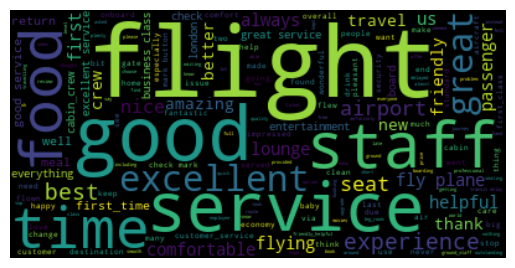

[('flight', 176), ('good', 91), ('service', 74), ('staff', 66), ('food', 58), ('time', 58), ('excellent', 45), ('great', 44), ('experience', 44), ('best', 42), ('airport', 37), ('seat', 37), ('nice', 27), ('plane', 25), ('flying', 25), ('comfortable', 25), ('always', 24), ('lounge', 24), ('helpful', 23), ('fly', 23), ('us', 22), ('first', 22), ('passenger', 22), ('thank', 20), ('crew', 19), ('better', 18), ('amazing', 18), ('new', 18), ('friendly', 18), ('travel', 17), ('first_time', 16), ('return', 16), ('well', 16), ('meal', 16), ('good service', 16), ('great service', 16), ('board', 15), ('entertainment', 15), ('business_class', 15), ('everything', 15), ('cabin_crew', 15), ('excellent service', 15), ('check', 14), ('london', 14), ('customer_service', 14), ('overall', 13), ('clean', 12), ('impressed', 11), ('people', 11), ('made', 11), ('stop', 11), ('customer', 11), ('thing', 11), ('last', 11), ('check mark', 11), ('two', 10), ('need', 10), ('served', 10), ('keep', 10), ('cabin', 10

In [22]:

 
lemmatize_word(text)
wordcloud=create_wordcloud(text)
print(cal_freq(wordcloud))

## Lemmatized vs not 

In [ ]:
lem_text=lemmatize_word(' '.join(text))
temp='great good well'
lem_text=lemmatize_word(temp)
print(text)
print(lem_text)


### Stemming result

In [ ]:
stem_text=stem_words(' '.join(text))
print(text)
print(stem_text)

wordcloud=create_wordcloud(stem_text)

## Original text VS Lemmatization Vs Stemming 

In [ ]:
print(cal_freq(' '.join(text)))
print(cal_freq(lem_text))
print(cal_freq(stem_text))

### Remove Punctuation

In [57]:
import re

punctuation_pattern = r'[^\w\s]'

text_cleaned = re.sub(punctuation_pattern, '', ' '.join(text))

    
print(cal_freq(' '.join(text)))
print(cal_freq(text_cleaned))

# word_frequencies, total_words = cal_freq(text)
# print(f"Word Frequencies: {word_frequencies}")
# print(f"Total number of words: {total_words}")

([('flight', 176), ('good', 91), ('service', 74), ('staff', 66), ('food', 58), ('time', 58), ('excellent', 45), ('great', 44), ('experience', 44), ('best', 42), ('airport', 37), ('seat', 37), ('nice', 27), ('plane', 25), ('flying', 25), ('comfortable', 25), ('always', 24), ('lounge', 24), ('helpful', 23), ('fly', 23), ('us', 22), ('first', 22), ('passenger', 22), ('thank', 20), ('crew', 19), ('better', 18), ('amazing', 18), ('new', 18), ('friendly', 18), ('travel', 17), ('first_time', 16), ('return', 16), ('well', 16), ('meal', 16), ('good service', 16), ('great service', 16), ('board', 15), ('entertainment', 15), ('business_class', 15), ('everything', 15), ('cabin_crew', 15), ('excellent service', 15), ('check', 14), ('london', 14), ('customer_service', 14), ('overall', 13), ('clean', 12), ('impressed', 11), ('people', 11), ('made', 11), ('stop', 11), ('customer', 11), ('thing', 11), ('last', 11), ('check mark', 11), ('two', 10), ('need', 10), ('served', 10), ('keep', 10), ('cabin', 1

### Filter Named Entities 

In [69]:
# Function to filter out named entities using SpaCy
def filter_named_entities(text):
    filtered_tokens = []
    for sentence in text:
        doc = nlp(sentence)
        filtered_tokens.extend([token.text for token in doc if not token.ent_type_])
    return filtered_tokens

### POS Filter 

In [141]:
# pos_tags=['NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'RB', 'RBR', 'RBS']
#=['NN', 'NNS', 'JJ']
def filter_by_pos(tokens, pos_tags):  # Nouns and adjectives
    tagged_tokens = pos_tag(tokens)
    filtered_tokens = [token[0] for token in tagged_tokens if token[1] in pos_tags]
    return filtered_tokens

[('great', 'JJ'), ('love', 'NN'), ('first_time', 'NN'), ('liked', 'VBD'), ('job', 'NN'), ('smiling', 'VBG'), ('face', 'NN'), ('with', 'IN'), ('smiling', 'VBG'), ('eyes', 'NNS'), ('smiling', 'VBG'), ('face', 'NN'), ('with', 'IN'), ('smiling', 'VBG'), ('eyes', 'NNS'), ('جده', 'NNP'), ('افضل_خطوط', 'NNP'), ('العالم', 'NNP'), ('OK', 'NNP'), ('hand🫡', 'NN'), ('excellent', 'JJ'), ('excellent', 'JJ'), ('looking_forward', 'NN'), ('see', 'VB'), ('more', 'JJR'), ('more', 'RBR'), ('rose', 'VBD'), ('architect', 'JJ'), ('hisham', 'NNS'), ('khabbaz', 'VBP'), ('want', 'VBP'), ('express', 'JJ'), ('appreciation', 'NN'), ('flight', 'NN'), ('overseas', 'RB'), ('nine', 'CD'), ('two', 'CD'), ('best', 'JJS'), ('boarded', 'VBD'), ('bayrak', 'NN'), ('taşıyıcı', 'NN'), ('gurur_verici', 'NN'), ('thy_çok', 'NN'), ('seviyorum_thy', 'JJ'), ('ile_gurur', 'NN'), ('duyuyorum', 'NN'), ('folded', 'VBD'), ('handsgüven', 'RB'), ('duyuyorum', 'JJ'), ('iyi_ki', 'NN'), ('varsın_thy', 'NN'), ('smiling', 'VBG'), ('face', 'NN'

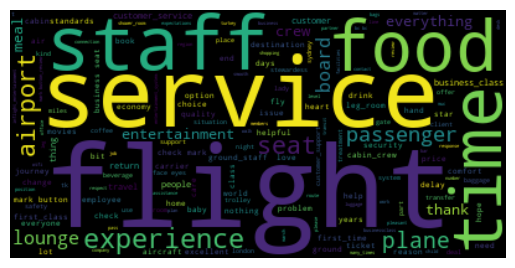

[('great', 'JJ'), ('love', 'NN'), ('first_time', 'NN'), ('liked', 'VBD'), ('job', 'NN'), ('smiling', 'VBG'), ('face', 'NN'), ('with', 'IN'), ('smiling', 'VBG'), ('eyes', 'NNS'), ('smiling', 'VBG'), ('face', 'NN'), ('with', 'IN'), ('smiling', 'VBG'), ('eyes', 'NNS'), ('جده', 'NNP'), ('افضل_خطوط', 'NNP'), ('العالم', 'NNP'), ('OK', 'NNP'), ('hand🫡', 'NN'), ('excellent', 'JJ'), ('excellent', 'JJ'), ('looking_forward', 'NN'), ('see', 'VB'), ('more', 'JJR'), ('more', 'RBR'), ('rose', 'VBD'), ('architect', 'JJ'), ('hisham', 'NNS'), ('khabbaz', 'VBP'), ('want', 'VBP'), ('express', 'JJ'), ('appreciation', 'NN'), ('flight', 'NN'), ('overseas', 'RB'), ('nine', 'CD'), ('two', 'CD'), ('best', 'JJS'), ('boarded', 'VBD'), ('bayrak', 'NN'), ('taşıyıcı', 'NN'), ('gurur_verici', 'NN'), ('thy_çok', 'NN'), ('seviyorum_thy', 'JJ'), ('ile_gurur', 'NN'), ('duyuyorum', 'NN'), ('folded', 'VBD'), ('handsgüven', 'RB'), ('duyuyorum', 'JJ'), ('iyi_ki', 'NN'), ('varsın_thy', 'NN'), ('smiling', 'VBG'), ('face', 'NN'

In [114]:
tokens=tokenize_words(text)
nouns=filter_by_pos(tokens,['NN','NNS'])
create_wordcloud(' '.join(nouns))

[('great', 'JJ'), ('love', 'NN'), ('first_time', 'NN'), ('liked', 'VBD'), ('job', 'NN'), ('smiling', 'VBG'), ('face', 'NN'), ('with', 'IN'), ('smiling', 'VBG'), ('eyes', 'NNS'), ('smiling', 'VBG'), ('face', 'NN'), ('with', 'IN'), ('smiling', 'VBG'), ('eyes', 'NNS'), ('جده', 'NNP'), ('افضل_خطوط', 'NNP'), ('العالم', 'NNP'), ('OK', 'NNP'), ('hand🫡', 'NN'), ('excellent', 'JJ'), ('excellent', 'JJ'), ('looking_forward', 'NN'), ('see', 'VB'), ('more', 'JJR'), ('more', 'RBR'), ('rose', 'VBD'), ('architect', 'JJ'), ('hisham', 'NNS'), ('khabbaz', 'VBP'), ('want', 'VBP'), ('express', 'JJ'), ('appreciation', 'NN'), ('flight', 'NN'), ('overseas', 'RB'), ('nine', 'CD'), ('two', 'CD'), ('best', 'JJS'), ('boarded', 'VBD'), ('bayrak', 'NN'), ('taşıyıcı', 'NN'), ('gurur_verici', 'NN'), ('thy_çok', 'NN'), ('seviyorum_thy', 'JJ'), ('ile_gurur', 'NN'), ('duyuyorum', 'NN'), ('folded', 'VBD'), ('handsgüven', 'RB'), ('duyuyorum', 'JJ'), ('iyi_ki', 'NN'), ('varsın_thy', 'NN'), ('smiling', 'VBG'), ('face', 'NN'

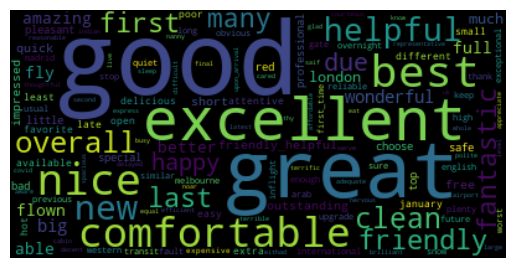

In [115]:
adj=filter_by_pos(tokens,['JJ', 'JJR', 'JJS'])
create_wordcloud(' '.join(adj))

['traveled', 'several_times', 'business', 'great', 'time', 'kind', 'staff', 'clean', 'aircraft', 'excellent', 'food', 'constant', 'attention', 'customer', 'armchairs', 'transform', 'beds_comfortable', 'pillow_blanket', 'return', 'maldives', 'pajamas', 'make', 'pleasant', 'comfortable', 'entertainment', 'board', 'full', 'films', 'languages', 'including', 'italian', 'music_games', 'traveled', 'say', 'superior', 'mrs', 'best', 'need', 'add', 'soft_drink', 'menu', 'sprite', 'people', 'can', '’', 't', 'caffeine', 'best', 'best', 'life', 'till', 'food', 'good', 'service', 'good', 'thank', 'helpful', 'flight_attendants', 'flight_attendants', 'helpful', 'offered', 'snack', 'asked', 'water', 'thing', 'lotion', 'toilet', 'refreshing', 'fragrance', 'agent', 'not', 'knowledgable', 'boarding', 'bit', 'mess', 'people_standing', 'around', 'full', 'terminal', 'check', 'agent', 'gate', 'not', 'let_us', 'know', 'customs', 'laws', 'bags', 'delayed', 'caused_stress', 'us', 'already', 'tired', 'jet_lagged'

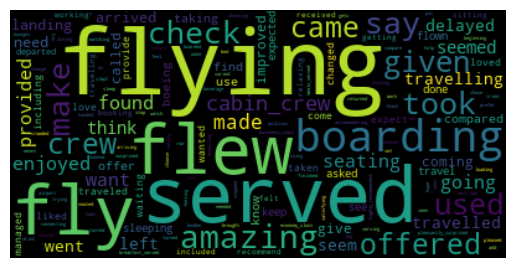

In [146]:
verb=filter_by_pos(tokens,['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'])
print(tokens)
create_wordcloud(' '.join(verb))

['great love first_time liked job  smiling face with smiling eyes smiling face with smiling eyes', 'جده افضل_خطوط العالم  OK hand🫡', 'excellent excellent looking_forward see more more  rose', 'architect hisham khabbaz want express appreciation flight overseas nine two best boarded', 'bayrak taşıyıcı gurur_verici', 'thy_çok seviyorum_thy ile_gurur duyuyorum  folded handsgüven duyuyorum iyi_ki varsın_thy  smiling face with smiling eyes', 'thy türkiye’nin lideri dünyanın gözdesi hava yollarımız gurur_kaynağımız', 'good organization members office definitely need more desks serve long_queue shorten waiting times wait almost getting served served however service brilliant extremely_helpful knowledgeable staff', 'thy_gurur duyuyorum sizinle', 'thy_i̇yi ki varsınızzz  red heart', 'süper hiç sorun yaşamadım', 'world greatest company', 'good employee service centre', 'gururumuz_thy kadirşinas misafirperver asil milletimin havayolu uçaklarınızın tekerine taş değdirmesin tüm çalışanlara kolaylıkl

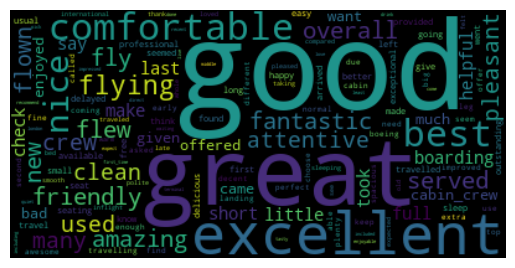

In [147]:
text2 = df[(df.sub_topic == 'food & beverage service')
        & (df.sentiment == 'Positive')]['bigram_sent'].drop_duplicates().tolist()
print(text)
tokens=tokenize_words(text2)
nouns_adj=filter_by_pos(tokens,['JJ', 'JJR', 'JJS','VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'])
create_wordcloud(' '.join(nouns_adj))


[['traveled', 'several_times', 'business', 'great', 'time', 'kind', 'staff', 'clean', 'aircraft', 'excellent', 'food', 'constant', 'attention', 'customer', 'armchairs', 'transform', 'beds_comfortable', 'pillow_blanket', 'return', 'maldives', 'pajamas', 'make', 'pleasant', 'comfortable', 'entertainment', 'board', 'full', 'films', 'languages', 'including', 'italian', 'music_games', 'traveled', 'say', 'superior'], ['first_class', 'good', 'first', 'business', 'ev', 'time'], ['residence', 'experience', 'absolutely_amazing', 'experience', 'chance', 'test', 'residence', 'flew', 'lot', 'chance', 'test', 'first_class', 'cabins', 'launched', 'unique', 'product', 'absolutely', 'nothing', 'say', 'except', 'whole', 'experience', 'awesome', 'time', 'driver', 'comes', 'pick', 'home', 'disembark', 'spending', 'wonderful', 'time', 'crew', 'extremely', 'attentive', 'actually', 'butler', 'board', 'personal', 'chef', 'offer', 'special', 'dishes', 'flight', 'offered', 'course', 'testing', 'menu', 'absolute

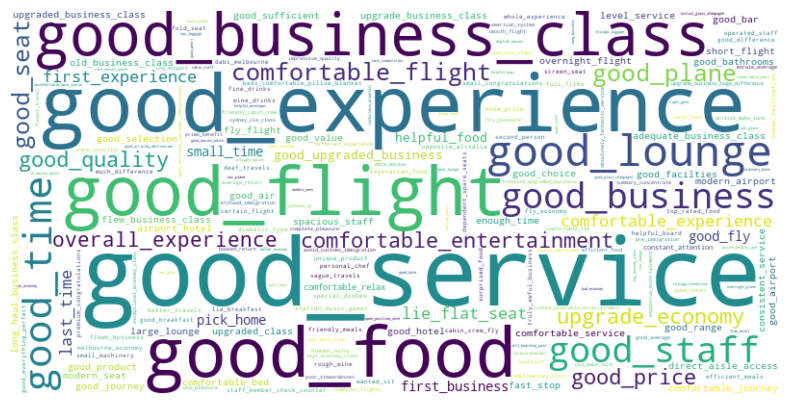

In [219]:
from nltk.tokenize import RegexpTokenizer

# Function to tokenize each review
def tokenize_reviews(reviews):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens_list = [tokenizer.tokenize(review.lower()) for review in reviews]
    return tokens_list
# Tokenize the reviews in the 'bigram_sent' column
tokenized_reviews = tokenize_reviews(df[(df.sub_topic == 'first & business class')
                                        & (df.sentiment == 'Positive')]['bigram_sent'])
print(tokenized_reviews)

# Function to filter tokens by POS tags
def filter_by_pos(tokens, pos_tags):
    tagged_tokens = pos_tag(tokens)
    filtered_tokens = [(token, pos_tag) for token, pos_tag in tagged_tokens if pos_tag in pos_tags]
    return filtered_tokens

# Normalization function
def normalize_word(word, synonym_dict):
    return synonym_dict.get(word, word)

# Function to generate JJ_NN bigrams within each review
def generate_adj_noun_bigrams(tokens_list):
    bigrams_list = []
    for tokens in tokens_list:
        tagged_tokens = filter_by_pos(tokens, ['JJ', 'JJR', 'JJS', 'NN', 'NNS'])
        for i in range(len(tagged_tokens)):
            if tagged_tokens[i][1].startswith('JJ'):  # If the token is an adjective
                normalized_adj = normalize_word(tagged_tokens[i][0], synonym_dict)
                for j in range(i + 1, len(tagged_tokens)):
                    if tagged_tokens[j][1].startswith('NN'):  # Find the closest noun
                        bigrams_list.append(f"{normalized_adj}_{tagged_tokens[j][0]}")
                        break
    return bigrams_list


synonym_dict = {
    # Positive adjectives
    'good': 'good', 'well': 'good', 'perfect': 'good', 'excellent': 'good', 'nice': 'good', 'great': 'good', 'wonderful': 'good', 'fantastic': 'good', 'fabulous': 'good', 'splendid': 'good', 'marvelous': 'good', 'superb': 'good', 'outstanding': 'good', 'awesome': 'good', 'positive': 'good', 'pleasing': 'good','best':'good','pleasant':'good',
    'happy': 'happy', 'joyful': 'happy', 'cheerful': 'happy', 'content': 'happy', 'pleased': 'happy', 'delighted': 'happy', 'ecstatic': 'happy', 'jovial': 'happy', 'merry': 'happy', 'gleeful': 'happy',
    'quick': 'fast', 'speedy': 'fast', 'rapid': 'fast', 'swift': 'fast', 'brisk': 'fast', 'hasty': 'fast', 'prompt': 'fast',
    'comfortable': 'comfortable', 'cozy': 'comfortable', 'pleasant': 'comfortable', 'relaxing': 'comfortable', 'easy': 'comfortable', 'snug': 'comfortable', 'agreeable': 'comfortable',
    'helpful': 'helpful', 'supportive': 'helpful', 'attentive': 'helpful', 'courteous': 'helpful', 'accommodating': 'helpful', 'considerate': 'helpful', 'useful': 'helpful',
    'friendly': 'friendly', 'kind': 'friendly', 'amiable': 'friendly', 'warm': 'friendly', 'cordial': 'friendly', 'welcoming': 'friendly', 'nice': 'friendly',
    'efficient': 'efficient', 'effective': 'efficient', 'productive': 'efficient', 'competent': 'efficient', 'capable': 'efficient',

    # Negative adjectives
    'bad': 'bad', 'poor': 'bad', 'terrible': 'bad', 'awful': 'bad', 'horrible': 'bad', 'dreadful': 'bad', 'abysmal': 'bad', 'atrocious': 'bad', 'shoddy': 'bad', 'lousy': 'bad', 'subpar': 'bad', 'negative': 'bad', 'unpleasant': 'bad', 'disappointing': 'bad','worst': 'bad',
    'slow': 'slow', 'sluggish': 'slow', 'lethargic': 'slow', 'unhurried': 'slow', 'deliberate': 'slow', 'lagging': 'slow', 'dawdling': 'slow',
    'uncomfortable': 'uncomfortable', 'uneasy': 'uncomfortable', 'inconvenient': 'uncomfortable', 'distressing': 'uncomfortable', 'awkward': 'uncomfortable', 'annoying': 'uncomfortable', 'bothersome': 'uncomfortable',
    'unhelpful': 'unhelpful', 'rude': 'unhelpful', 'unfriendly': 'unhelpful', 'disrespectful': 'unhelpful', 'uncooperative': 'unhelpful', 'inconsiderate': 'unhelpful', 'useless': 'unhelpful', 'ineffective': 'unhelpful',
    'unhappy': 'unhappy', 'sad': 'unhappy', 'disappointed': 'unhappy', 'miserable': 'unhappy', 'dissatisfied': 'unhappy', 'frustrated': 'unhappy', 'upset': 'unhappy', 'dejected': 'unhappy',
    'angry': 'angry', 'mad': 'angry', 'furious': 'angry', 'irate': 'angry', 'livid': 'angry', 'outraged': 'angry', 'incensed': 'angry', 'enraged': 'angry', 'fuming': 'angry', 'wrathful': 'angry',
    'rude': 'rude', 'impolite': 'rude', 'disrespectful': 'rude', 'ungracious': 'rude', 'uncivil': 'rude', 'insolent': 'rude',

    # Neutral/objective adjectives
    'big': 'large', 'huge': 'large', 'enormous': 'large', 'gigantic': 'large', 'massive': 'large', 'immense': 'large', 'vast': 'large', 'colossal': 'large', 'monstrous': 'large', 'tremendous': 'large', 'sizeable': 'large', 'grand': 'large',
    'small': 'small', 'tiny': 'small', 'little': 'small', 'miniature': 'small', 'minute': 'small', 'petite': 'small', 'diminutive': 'small', 'slight': 'small', 'compact': 'small',
    'clean': 'clean', 'spotless': 'clean', 'immaculate': 'clean', 'pristine': 'clean', 'pure': 'clean', 'sanitized': 'clean', 'hygienic': 'clean', 'neat': 'clean', 'tidy': 'clean',
    'dirty': 'dirty', 'filthy': 'dirty', 'grimy': 'dirty', 'soiled': 'dirty', 'unclean': 'dirty', 'mucky': 'dirty', 'stained': 'dirty', 'messy': 'dirty', 'disorderly': 'dirty',
    'modern': 'modern', 'new': 'modern', 'contemporary': 'modern', 'up-to-date': 'modern', 'current': 'modern', 'recent': 'modern', 'fashionable': 'modern', 'trendy': 'modern',
    'old': 'old', 'ancient': 'old', 'elderly': 'old', 'aged': 'old', 'senior': 'old', 'venerable': 'old', 'mature': 'old', 'outdated': 'old', 'antique': 'old',
    'busy': 'busy', 'occupied': 'busy', 'active': 'busy', 'engaged': 'busy', 'hectic': 'busy', 'bustling': 'busy',
    'calm': 'calm', 'peaceful': 'calm', 'serene': 'calm', 'tranquil': 'calm', 'composed': 'calm', 'placid': 'calm', 'relaxed': 'calm', 'cool': 'calm', 'collected': 'calm',
    'hot': 'hot', 'warm': 'hot', 'heated': 'hot', 'scorching': 'hot', 'boiling': 'hot', 'sweltering': 'hot', 'sizzling': 'hot', 'blazing': 'hot', 'fiery': 'hot',
    'cold': 'cold', 'chilly': 'cold', 'cool': 'cold', 'freezing': 'cold', 'frigid': 'cold', 'icy': 'cold', 'frosty': 'cold', 'bitter': 'cold', 'polar': 'cold',
    'beautiful': 'beautiful', 'pretty': 'beautiful', 'gorgeous': 'beautiful', 'lovely': 'beautiful', 'attractive': 'beautiful', 'stunning': 'beautiful', 'breathtaking': 'beautiful', 'handsome': 'beautiful', 'charming': 'beautiful', 'elegant': 'beautiful',
    'ugly': 'ugly', 'unattractive': 'ugly', 'hideous': 'ugly', 'unsightly': 'ugly', 'repulsive': 'ugly', 'disgusting': 'ugly', 'ghastly': 'ugly', 'horrid': 'ugly', 'monstrous': 'ugly', 'revolting': 'ugly',
    'brave': 'brave', 'courageous': 'brave', 'fearless': 'brave', 'valiant': 'brave', 'heroic': 'brave', 'bold': 'brave', 'daring': 'brave', 'intrepid': 'brave', 'gallant': 'brave',
    'scared': 'afraid', 'frightened': 'afraid', 'terrified': 'afraid', 'fearful': 'afraid', 'petrified': 'afraid', 'panicked': 'afraid', 'horrified': 'afraid', 'alarmed': 'afraid',
    'intelligent': 'smart', 'clever': 'smart', 'brilliant': 'smart', 'bright': 'smart', 'wise': 'smart', 'knowledgeable': 'smart', 'sharp': 'smart', 'brainy': 'smart', 'erudite': 'smart',
    'stupid': 'stupid', 'dumb': 'stupid', 'foolish': 'stupid', 'idiotic': 'stupid', 'moronic': 'stupid', 'unintelligent': 'stupid', 'dense': 'stupid', 'ignorant': 'stupid',
    'rich': 'wealthy', 'affluent': 'wealthy', 'prosperous': 'wealthy', 'well-off': 'wealthy', 'loaded': 'wealthy', 'flush': 'wealthy', 'opulent': 'wealthy',
    'poor': 'poor', 'impoverished': 'poor', 'needy': 'poor', 'destitute': 'poor', 'penniless': 'poor', 'broke': 'poor', 'indigent': 'poor',
    'young': 'young', 'youthful': 'young', 'juvenile': 'young', 'teenage': 'young', 'adolescent': 'young', 'immature': 'young',
    'clean': 'clean', 'spotless': 'clean', 'immaculate': 'clean', 'pristine': 'clean', 'pure': 'clean', 'sanitized': 'clean', 'hygienic': 'clean',
    'dirty': 'dirty', 'filthy': 'dirty', 'grimy': 'dirty', 'soiled': 'dirty', 'unclean': 'dirty', 'mucky': 'dirty', 'stained':'dirty',
}

# Generate JJ_NN bigrams within each review
bigram_list = generate_adj_noun_bigrams(tokenized_reviews)
print()
# Create the word cloud if bigrams are found
if bigram_list:
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',
        max_words=200,
    ).generate(' '.join(bigram_list))

    # Display the word cloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
else:
    print("No JJ_NN bigrams found to generate a word cloud.")

In [217]:
import json
with open('synonym_dict.json', 'w') as f:
      json.dump(synonym_dict, f, indent=4)

In [212]:
text3 = df[(df.sub_topic == 'first & business class')
        & (df.sentiment == 'Positive')]['final_text'].drop_duplicates().tolist()
cal_freq(' '.join(text3))
create_wordcloud(te)

([('flight', 547),
  ('seat', 330),
  ('good', 306),
  ('food', 277),
  ('service', 261),
  ('airline', 238),
  ('plane', 173),
  ('time', 172),
  ('Emirate', 152),
  ('experience', 133),
  ('comfortable', 133),
  ('staff', 131),
  ('one', 130),
  ('hour', 123),
  ('great', 123),
  ('meal', 110),
  ('airport', 105),
  ('excellent', 99),
  ('nice', 94),
  ('best', 92),
  ('fly', 85),
  ('passenger', 81),
  ('business class', 81),
  ('economy', 74),
  ('friendly', 74),
  ('really', 72),
  ('Dubai', 70),
  ('even', 67),
  ('well', 66),
  ('first', 66),
  ('u', 65),
  ('always', 64),
  ('will', 63),
  ('aircraft', 62),
  ('crew', 61),
  ('lounge', 61),
  ('Istanbul', 60),
  ('Etihad', 59),
  ('Abu Dhabi', 59),
  ('flying', 58),
  ('back', 57),
  ('drink', 56),
  ('check', 53),
  ('trip', 52),
  ('leg', 51),
  ('much', 50),
  ('choice', 49),
  ('old', 49),
  ('entertainment', 48),
  ('better', 48),
  ('Qatar', 46),
  ('bad', 45),
  ('bit', 45),
  ('Doha', 45),
  ('never', 44),
  ('way', 44)

# Adj_Noun 

Filtered Tokens with POS Tags: [('great', 'JJ'), ('love', 'NN'), ('first_time', 'NN'), ('job', 'NN'), ('face', 'NN'), ('eyes', 'NNS'), ('face', 'NN'), ('eyes', 'NNS'), ('hand🫡', 'NN'), ('excellent', 'JJ'), ('excellent', 'JJ'), ('looking_forward', 'NN'), ('more', 'JJR'), ('architect', 'JJ'), ('hisham', 'NNS'), ('express', 'JJ'), ('appreciation', 'NN'), ('flight', 'NN'), ('best', 'JJS'), ('bayrak', 'NN'), ('taşıyıcı', 'NN'), ('gurur_verici', 'NN'), ('thy_çok', 'NN'), ('seviyorum_thy', 'JJ'), ('ile_gurur', 'NN'), ('duyuyorum', 'NN'), ('duyuyorum', 'JJ'), ('iyi_ki', 'NN'), ('varsın_thy', 'NN'), ('face', 'NN'), ('eyes', 'NNS'), ('thy', 'JJ'), ('türkiye', 'JJ'), ('nin', 'NN'), ('lideri', 'NN'), ('dünyanın', 'NN'), ('gözdesi', 'NN'), ('hava', 'NN'), ('yollarımız', 'NN'), ('gurur_kaynağımız', 'NN'), ('good', 'JJ'), ('organization', 'NN'), ('members', 'NNS'), ('office', 'NN'), ('more', 'JJR'), ('desks', 'NNS'), ('long_queue', 'JJ'), ('shorten', 'NN'), ('times', 'NNS'), ('service', 'NN'), ('bril

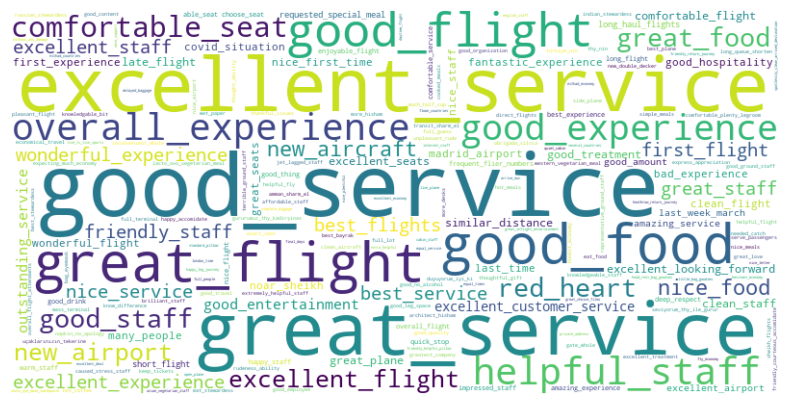

In [131]:

text = df[(df.sub_topic == 'first & business class')
        & (df.sentiment == 'Positive')]['bigram_sent'].drop_duplicates().tolist()

tokens=tokenize_words(text)
# Function to filter tokens by POS tags
def filter_by_pos(tokens, pos_tags):
    tagged_tokens = pos_tag(tokens)
    filtered_tokens = [token for token in tagged_tokens if token[1] in pos_tags]
    return filtered_tokens

# Filter by adjectives and nouns
nouns_adj = filter_by_pos(tokens, ['NN', 'NNS', 'JJ', 'JJR', 'JJS'])

# Debugging: Print filtered tokens with POS tags
print("Filtered Tokens with POS Tags:", nouns_adj)

# Function to generate bigrams with the closest noun to each adjective
def generate_adj_noun_bigrams(tagged_tokens):
    bigrams = []
    for i in range(len(tagged_tokens)):
        if tagged_tokens[i][1].startswith('JJ'):  # If the token is an adjective
            for j in range(i + 1, len(tagged_tokens)):
                if tagged_tokens[j][1].startswith('NN'):  # Find the closest noun
                    bigrams.append(f"{tagged_tokens[i][0]}_{tagged_tokens[j][0]}")
                    break
    return bigrams

# Generate bigrams
bigram_list = generate_adj_noun_bigrams(nouns_adj)

# Debugging: Print the generated bigrams
print("Generated Bigrams:", bigram_list)

# Create the word cloud
if bigram_list:  # Ensure there is at least one bigram
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',  # Choose a different color map
        max_words=200,       # Limit the number of words
    ).generate(' '.join(bigram_list))

    # Display the word cloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
else:
    print("No bigrams found to generate a word cloud.")

[('great', 'JJ'), ('love', 'NN'), ('first_time', 'NN'), ('liked', 'VBD'), ('job', 'NN'), ('smiling', 'VBG'), ('face', 'NN'), ('with', 'IN'), ('smiling', 'VBG'), ('eyes', 'NNS'), ('smiling', 'VBG'), ('face', 'NN'), ('with', 'IN'), ('smiling', 'VBG'), ('eyes', 'NNS'), ('جده', 'NNP'), ('افضل_خطوط', 'NNP'), ('العالم', 'NNP'), ('OK', 'NNP'), ('hand🫡', 'NN'), ('excellent', 'JJ'), ('excellent', 'JJ'), ('looking_forward', 'NN'), ('see', 'VB'), ('more', 'JJR'), ('more', 'RBR'), ('rose', 'VBD'), ('architect', 'JJ'), ('hisham', 'NNS'), ('khabbaz', 'VBP'), ('want', 'VBP'), ('express', 'JJ'), ('appreciation', 'NN'), ('flight', 'NN'), ('overseas', 'RB'), ('nine', 'CD'), ('two', 'CD'), ('best', 'JJS'), ('boarded', 'VBD'), ('bayrak', 'NN'), ('taşıyıcı', 'NN'), ('gurur_verici', 'NN'), ('thy_çok', 'NN'), ('seviyorum_thy', 'JJ'), ('ile_gurur', 'NN'), ('duyuyorum', 'NN'), ('folded', 'VBD'), ('handsgüven', 'RB'), ('duyuyorum', 'JJ'), ('iyi_ki', 'NN'), ('varsın_thy', 'NN'), ('smiling', 'VBG'), ('face', 'NN'

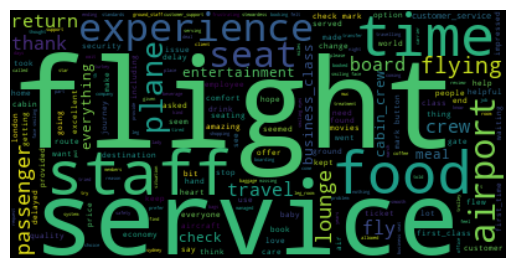

In [120]:
nouns_verb=filter_by_pos(tokens,['NN', 'NNS','VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'])
create_wordcloud(' '.join(nouns_verb))

[('great', 'JJ'), ('love', 'NN'), ('first_time', 'NN'), ('liked', 'VBD'), ('job', 'NN'), ('smiling', 'VBG'), ('face', 'NN'), ('with', 'IN'), ('smiling', 'VBG'), ('eyes', 'NNS'), ('smiling', 'VBG'), ('face', 'NN'), ('with', 'IN'), ('smiling', 'VBG'), ('eyes', 'NNS'), ('جده', 'NNP'), ('افضل_خطوط', 'NNP'), ('العالم', 'NNP'), ('OK', 'NNP'), ('hand🫡', 'NN'), ('excellent', 'JJ'), ('excellent', 'JJ'), ('looking_forward', 'NN'), ('see', 'VB'), ('more', 'JJR'), ('more', 'RBR'), ('rose', 'VBD'), ('architect', 'JJ'), ('hisham', 'NNS'), ('khabbaz', 'VBP'), ('want', 'VBP'), ('express', 'JJ'), ('appreciation', 'NN'), ('flight', 'NN'), ('overseas', 'RB'), ('nine', 'CD'), ('two', 'CD'), ('best', 'JJS'), ('boarded', 'VBD'), ('bayrak', 'NN'), ('taşıyıcı', 'NN'), ('gurur_verici', 'NN'), ('thy_çok', 'NN'), ('seviyorum_thy', 'JJ'), ('ile_gurur', 'NN'), ('duyuyorum', 'NN'), ('folded', 'VBD'), ('handsgüven', 'RB'), ('duyuyorum', 'JJ'), ('iyi_ki', 'NN'), ('varsın_thy', 'NN'), ('smiling', 'VBG'), ('face', 'NN'

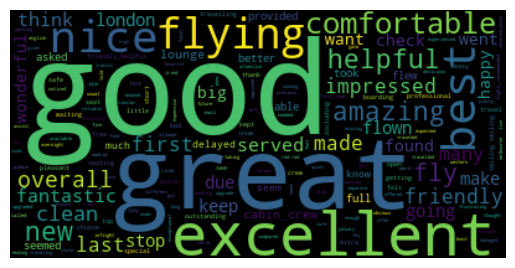

In [121]:
nouns_verb=filter_by_pos(tokens,['JJ', 'JJR', 'JJS','VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'])
create_wordcloud(' '.join(nouns_verb))

# nltk bigrams

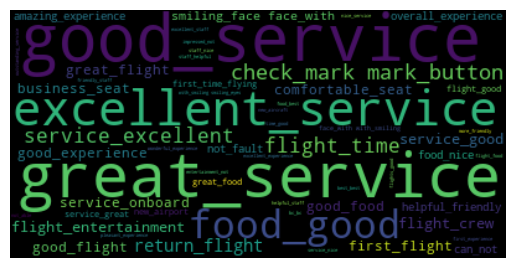

In [134]:
tokens=tokenize_words(text)
# Generate bigrams
bigram_list = ['_'.join(bigram) for bigram in bigrams(tokens)]
create_wordcloud(' '.join(bigram_list))

### Filter Words

In [58]:
def filter_text(text_list, words_to_filter):
    cleaned_list = []
    for sentence in text_list:
        words = sentence.lower().split()
        cleaned_list.extend([word for word in words if word not in words_to_filter])
    return cleaned_list


In [66]:
words_to_filter=["first_time","good","flight","flights","airport","fly","flying","hi", "hello", "im", "could", "would", "u", "you", "one", "get", "got", "even", "day", "allah", "god", "istanbul", "pm", "am", "hour", "really", "gave", "wont", "next", "minutes", "hour", "hours", "we", "it", "take", "we", "saudi", "airlines", "airline", "airway", "airways", "dubai", "emirate", "emirates", "cario", "flydubai", "egypt", "egyptair", "jeddah", "riyadh", "it\u2019s", "dammam", "minute", "said", "year", "way", "another", "doha", "qatar", "turkish", "flyadeal", "flynas", "we", "etihad", "u", "istanbul", "go", "also", "still", "back", "i", "allah", "mashallah", "inshallah", "cairo", "luxor", "abu", "dhabi", "aswan", "canada", "france", "uae", "ksa", "trip", "verified", "saudia", "mansoura", "etc", "in"]

In [220]:
import json
with open('filtered_words.json', 'w') as f:
      json.dump(words_to_filter, f, indent=4)

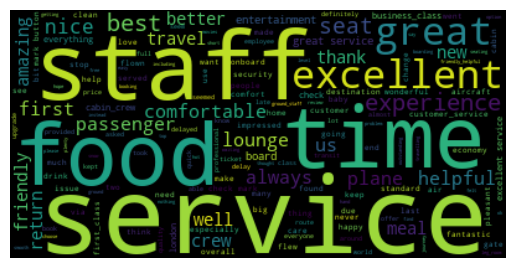

In [67]:
text_cleaned=filter_text(text,words_to_filter)
create_wordcloud(' '.join(text_cleaned))

# Better Display


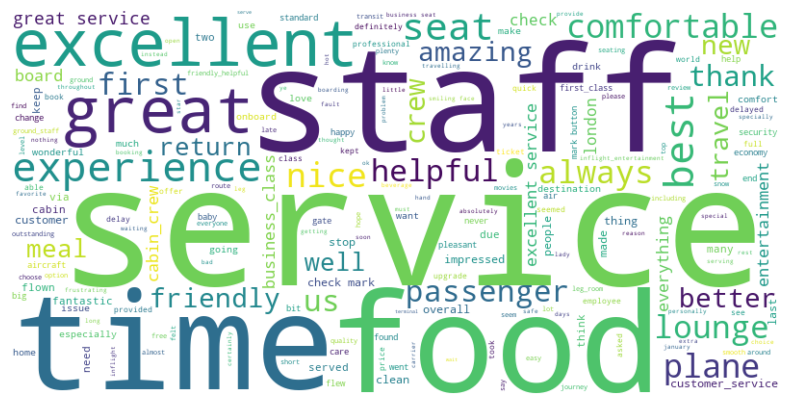

In [68]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',  # Choose a different color map
    max_words=200,  # Limit the number of words
).generate(' '.join(text_cleaned))

# Display the word cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

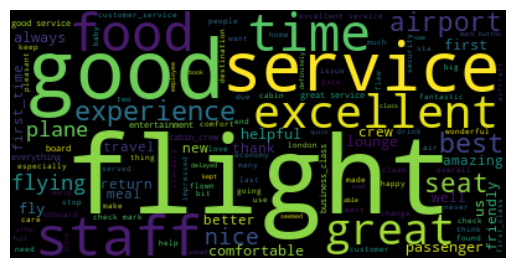

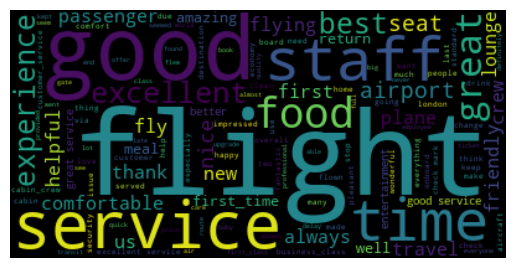

In [86]:
create_wordcloud(' '.join(text))

filter_text=filter_by_pos(text)
create_wordcloud(' '.join(filter_text))


# Boost Bigrams

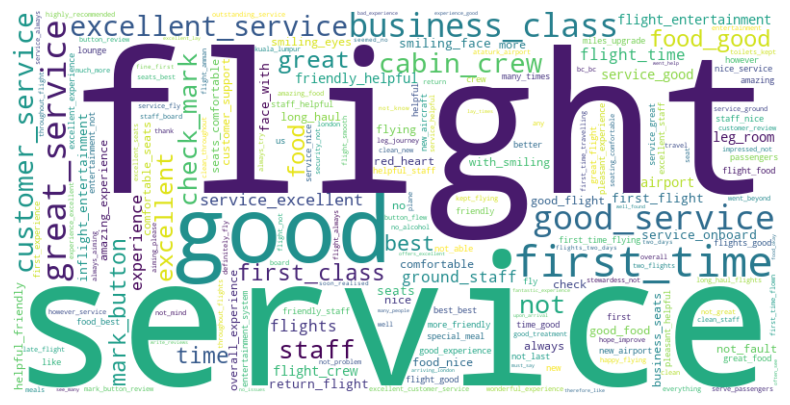

In [102]:

# Step 1: Flatten the list of sentences into a single string
all_text = ' '.join(text)

# Step 2: Count the frequency of words and bigrams
word_counts = Counter()

# Tokenize and count words and bigrams
words = all_text.split()
for i in range(len(words) - 1):
    bigram = f"{words[i]}_{words[i + 1]}"
    word_counts[bigram] += 1
    word_counts[words[i]] += 1  # Count each individual word

# Step 3: Increase the frequency of the desired bigrams
boost_factor = 6  # Adjust this factor as needed
for bigram in list(word_counts):
    if '_' in bigram:  # Only boost bigrams (those containing an underscore)
        word_counts[bigram] *= boost_factor

# Step 4: Generate the word cloud
# Convert the word_counts to a format suitable for WordCloud
wordcloud_input = {k.replace('_', '_'): v for k, v in word_counts.items()}  # Replace underscores for display

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_input)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()